In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

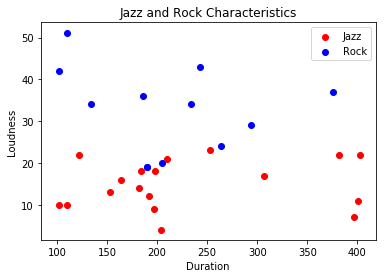

In [6]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [21]:
# Your nearest neighbor algorithm here.


def distance_function(x,y):
    distance = (x**2 + y**2)**(.5)
    return distance
    
def knn_mk(duration,loudness,reference,nn_distance=1000000000):
    for index, row in reference.iterrows():
        row['distance'] = distance_function((loudness-row['loudness']),(duration-row['duration']))
        yn = 0
        if row['distance'] < nn_distance:
            yn = 1
        if yn == 1:
            nn_distance = row['distance']
            nn_jazz = row['jazz']
    return nn_jazz

# The input value nn_distance in the function needs to be high enough to avoid it being smaller 
# than the lowest distance to the nearest neighbor.
            


In [22]:
knn_mk(184,30,music)


0.0